In [6]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd # to store tabular data
import numpy as np # to do some math
import matplotlib.pyplot as plt # a popular data visualization tool
import seaborn as sns # another popular data visualization tool
from sklearn.preprocessing import Imputer
%matplotlib inline
plt.style.use('fivethirtyeight') # a popular data visualization theme


In [7]:
# load in our dataset using pandas
pima = pd.read_csv('./data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# we will want to fill in missing values to see all 9 columns
impute = Imputer(strategy='mean')
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns = pima.columns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f2954e0>,
      dtype=object)

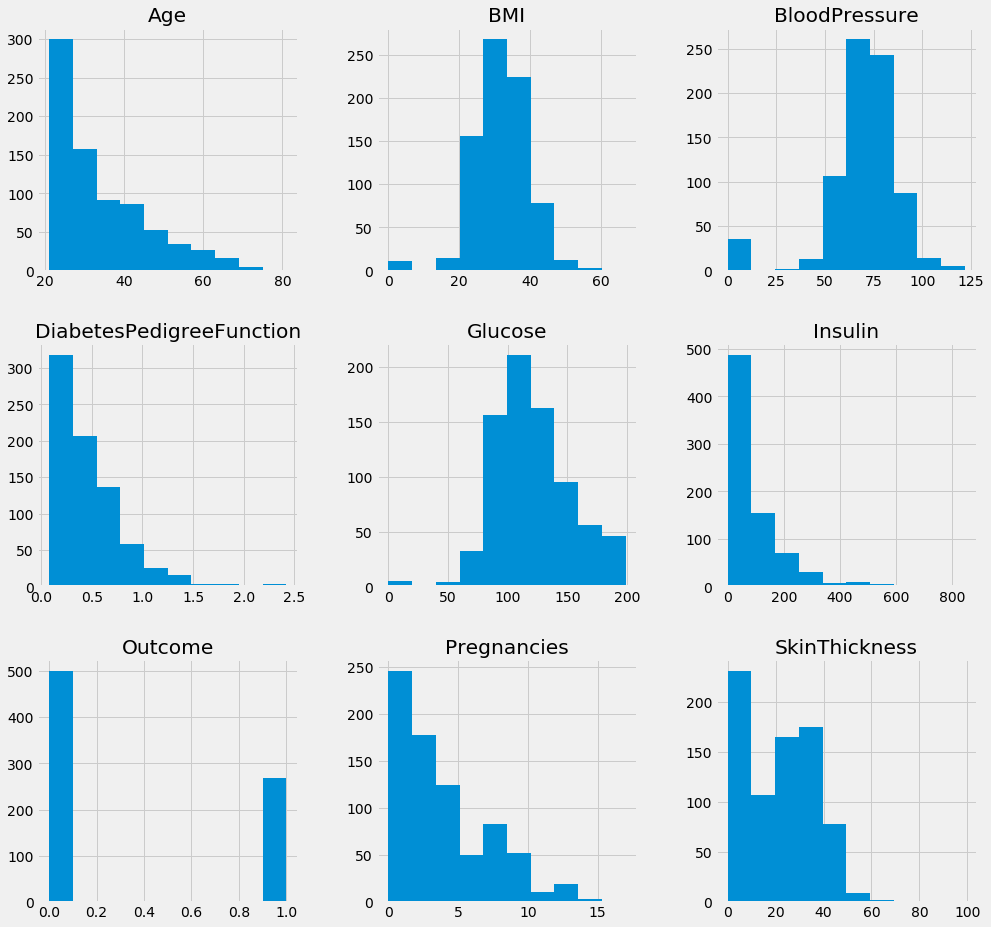

In [11]:
pima_imputed_mean.hist(figsize=(15,15))

In [12]:
pima_imputed_mean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa9c320>,
      dtype=object)

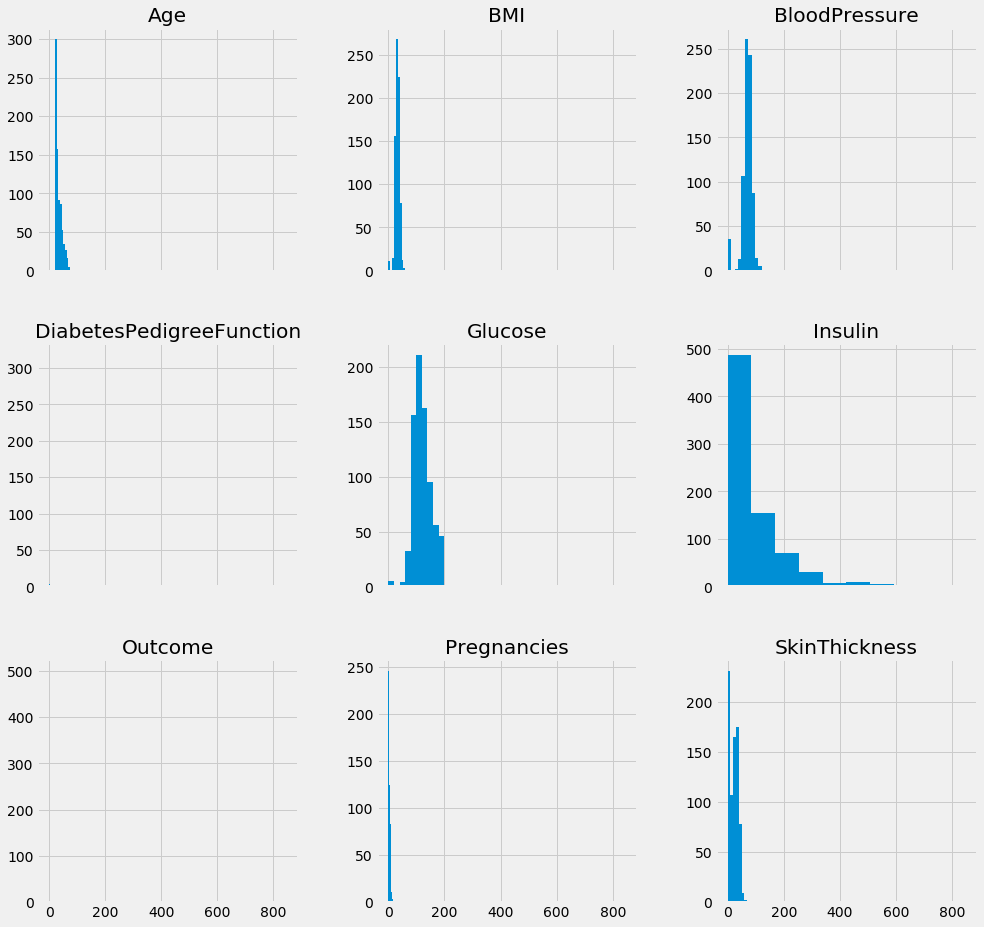

In [13]:
# with the same x axis (the y axis is not as important here)
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)


In [14]:
print(pima['Glucose'].head())

0    148
1     85
2    183
3     89
4    137
Name: Glucose, dtype: int64


In [15]:
# get the mean of the column
mu = pima['Glucose'].mean()

# get the standard deviation of the column
sigma = pima['Glucose'].std()

# calculate z scores for every value in the coulmn
print(((pima['Glucose'] - mu) / sigma).head())


0    0.847771
1   -1.122665
2    1.942458
3   -0.997558
4    0.503727
Name: Glucose, dtype: float64


In [16]:
# build in z-score normalize
from sklearn.preprocessing import StandardScaler

In [25]:
# mean and std before z score standardizing
pima['Glucose'].mean(), pima['Glucose'].std()


(120.89453125, 31.97261819513622)

Text(0.5,1,'Distribution of plasma_glucose_concentration')

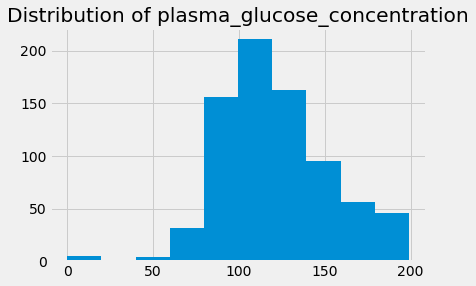

In [26]:
ax = pima['Glucose'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')


In [31]:
scaler = StandardScaler()

# note we use the double bracket notation [[]] because the transformer requires a dataframe
glucose_z_score_standardized = scaler.fit_transform(pima[['Glucose']])

# mean of 0 (floating point error) and standard deviation of 1
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()


(-9.25185853854297e-18, 1.0)

Text(0.5,1,'Distribution of plasma_glucose_concentration after Z Score Scaling')

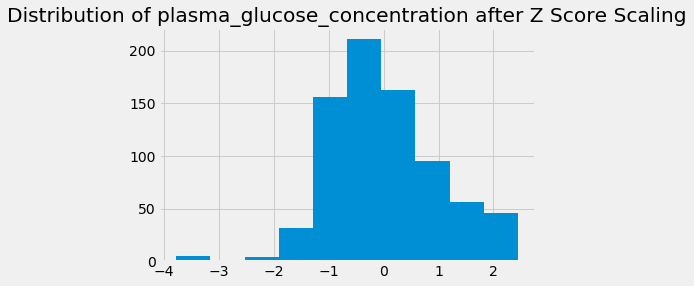

In [32]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20ab02e8>,
      dtype=object)

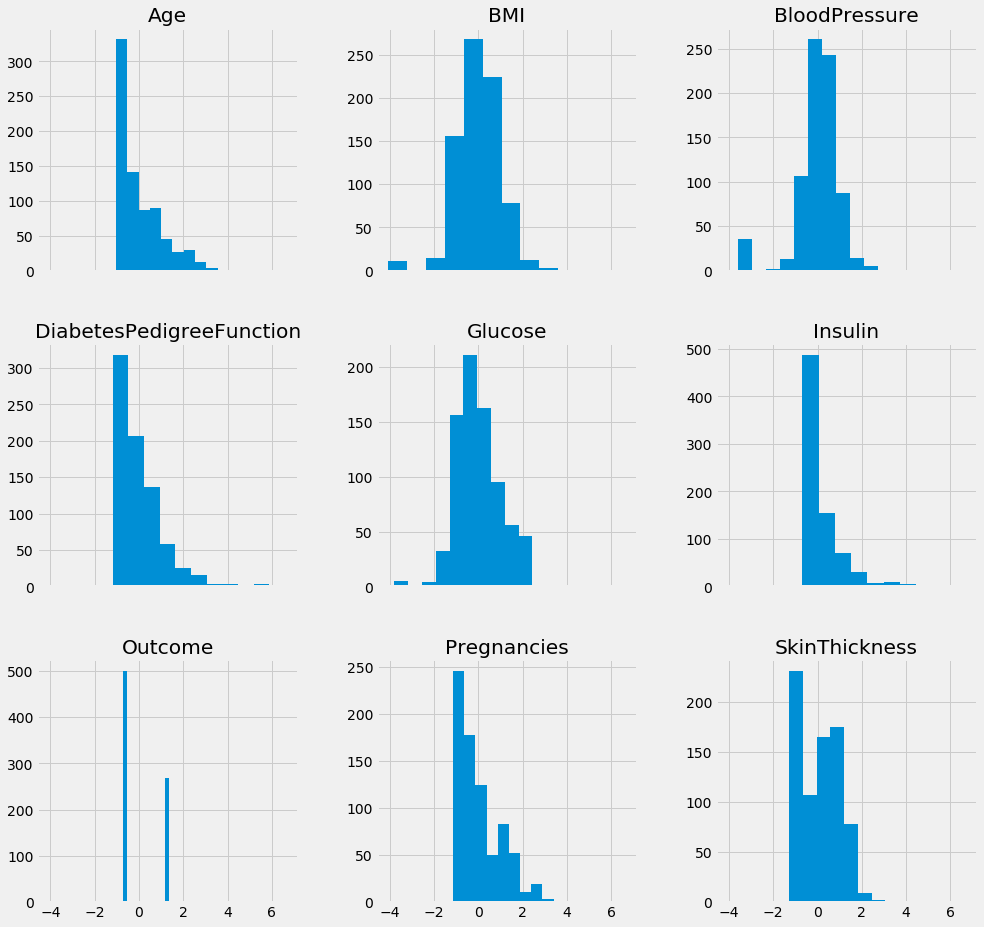

In [34]:
scale = StandardScaler() # instantiate a z-scaler object

# now all share the same "space"
pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima.columns)
pima_imputed_mean_scaled.hist(figsize=(15,15), sharex=True)
